<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/Statistics_Anova_Test(F_score).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""

"" ANOVA test:
When you are dealing with data which are presented to you in different groups or sub-populations, 
you might be interested in knowing whether they arise from the same population, or they represent different populations (with different parameters).
As you can see, there are three different footpaths. Now the question is: are those three footpaths belonging to the same species of animals? Well, 
we can guess that two of them (orange and black) actually do, 
since they belong to birds, while the third one (in blue) is more likely to belong to a dog.
The answer to this problem is what the (One-way) ANalysis Of VAriance is meant for. 
It basically decomposes the variances within each group and among groups, 
relying on the Null Hypothesis that groups/samples have been drawn from the same population, hence their means are equivalent


The ANOVA produces an F-statistic (explained later on): for high values of F (generally higher than 3.68, which corresponds to a significance level of 5%) 
we can reject with sufficient confidence the Null, concluding that groups are not arising from the same population.

""''

As a case study, imagine a bunch of students from different colleges taking the same exam. You want to see if one college outperforms the other,
hence your null hypothesis is that the means of GPAs in each group are equivalent to those of the other groups. 
To keep it simple, we will consider 3 groups (college ‘A’, ‘B’, ‘C’) with 6 students each.
"""

In [0]:
import pandas as pd
import numpy as np

a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df



,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [0]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print(' Average mark for college A: {}'.format(m1))
print(' Average mark for college B: {}'.format(m2))
print(' Average mark for college C: {}'.format(m3))

 Average mark for college A: 25.0
 Average mark for college B: 26.5
 Average mark for college C: 26.0


In [0]:
### compute the overall mean (k is the number of groups, hence in our case k=3):

M = (m1+m2+m3) / 3
print( 'Overall mean of all values:{}'.format(M))

Overall mean of all values:25.833333333333332


In [0]:
##compute the ‘between-group’ sum of squared differences (where n is the number of observations per group/college, hence in our case n=6):

SSb=6*((m1-M)**2+(m2-M)**2+(m3-M)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))


Between-groups Sum of Squared Differences: 6.999999999999999


In [0]:
###With those results, we can already compute one of the components of our F-score, which is the between-group mean square value (MSb). 
### Indeed, knowing that the between-group degrees of freedom are k-1 (that means, one less than the number of groups), we can compute the MSb as:
###  MSb = SSb /df( degree of freedom

MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [0]:
### calculate the “within-group” sum of squares.

## SSW = Ei Ej(Yij - Y-J)^2

err_a=list(a-m1)
err_b=list(b-m2)
err_c=list(c-m3)
err=err_a+err_b+err_c
ssw=[]
for i in err:
    ssw.append(i**2)
    

SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


In [0]:
###Again, knowing that there are k(n-1) within-group degrees of freedom (hence in our case 15), we can compute the within-group mean square value:
### MSb = SSb /df( degree of freedom
MSw=SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


In [0]:
##compute the F-score:
## F = MSb /MSw

F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


In [0]:
### let's double cehck with SCIpy Python library

import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

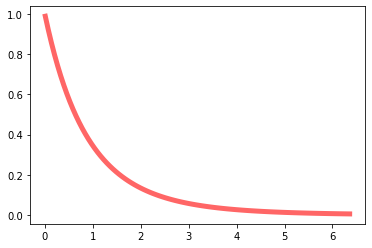

In [0]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

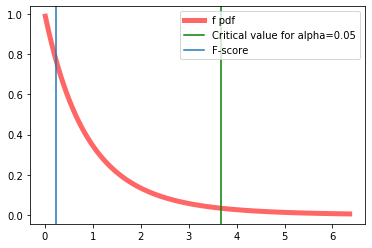

In [0]:
#### Let’s say we set alpha, which the level of significance, equal to 5%. The corresponding F-critical value is 3.68. Hence:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15


x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

In [0]:
#####
"""
We do not reject the Null hypothesis about equality among means. 
We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.


"""

# Descriptive Statistics:
 Finding skewness, Kurtosis and PDF,CDF,PPF...

In [0]:

import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.drop('species',axis=1)
x=X['sepal_length']

In [76]:

import statistics
import pandas as pd
# print('Mean: {}'.format(x.mean()))
mean=x.sum()/len(x)
print('Mean: {}'.format(mean))
median = x.median()
print('Median: {}'.format(median))

mode = list(x.mode())
print('Mode: {}'.format(mode))




Mean: 5.843333333333334
Median: 5.8
Mode: [5.0]


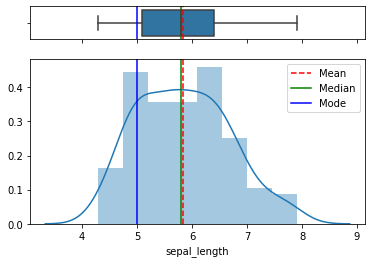

In [77]:
####  On the other hand, if have either mode>median>mean or mean>median>mode, we are facing an asymmetric distribution:
"""
The first picture (mean>median>mode) shows a positive asymmetric distribution, 
while the second one (mode>median>mean) exhibits a negative asymmetry. 
A way to check the symmetry of distribution is thought the measure of Skewness:
"""


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(x, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(x, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})
ax_box.set(xlabel='')
plt.show()

In [78]:
##Let’s compute the Skewness:

from scipy.stats import skew
print('Skewness: {}'.format(skew(x)))

Skewness: 0.3117530585022963


In [0]:
##As you can see, the skewness is greater than zero, hence it indicates a positive asymmetry, confirming the fact that mean>median>mode.

Measures of **Dispersion** **bold text**

In [79]:
###Range: it is the most intuitive measure of dispersion. It is computed as the difference between the maximum and minimum values, and it suggests how spread our data are.

r=x.max()-x.min()
print('Range: ',r)

Range:  3.6000000000000005


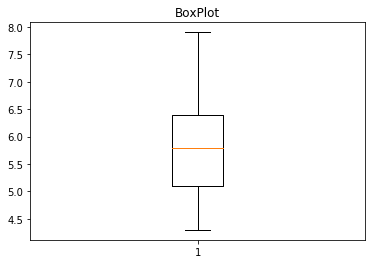

In [81]:
fig1, ax1 = plt.subplots()
ax1.set_title('BoxPlot')
ax1.boxplot(x);

*Interquantile Range: *quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. More specifically, the 0.x quantile (also called x percentile) leaves at its left x% of the probability. Furthermore, the 0, 0.25, 0.5, 0.75 and 1 quantiles are known as, respectively, 0, 1st, 2nd,3rd and 4th quartiles. Note that the Second Quartile (Q2) corresponds to the median value, since it leaves 50% of the probability to its left and 50% of probability to its right.

In [82]:
Q1=np.percentile(x, 25) 
Q2=np.percentile(x, 50)  
Q3=np.percentile(x, 75)
print('Q1: {}'.format(Q1))
print('Q2: {}'.format(Q2))
print('Q3: {}'.format(Q3))

Q1: 5.1
Q2: 5.8
Q3: 6.4


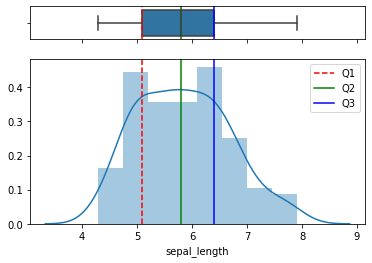

In [83]:
##Let’s visualize them on our distribution graph:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
sns.boxplot(x, ax=ax_box)
ax_box.axvline(Q1, color='r', linestyle='--')
ax_box.axvline(Q2, color='g', linestyle='-')
ax_box.axvline(Q3, color='b', linestyle='-')

sns.distplot(x, ax=ax_hist)
ax_hist.axvline(Q1, color='r', linestyle='--')
ax_hist.axvline(Q2, color='g', linestyle='-')
ax_hist.axvline(Q3, color='b', linestyle='-')

plt.legend({'Q1':Q1,'Q2':Q2,'Q3':Q3})
ax_box.set(xlabel='')
plt.show()

In [84]:
IQR=Q3-Q1
print('Interquartile Range: ',IQR)

Interquartile Range:  1.3000000000000007


In [85]:
sigma=np.std(x)
print('Standard Deviation: ',sigma)

Standard Deviation:  0.8253012917851409


# Hypothesis testing:

 Meaning : Proposed explaination
           Objectively testable
      Null hypothseis true until prove n
      Alternarive Hypothesis will be to prove Null hyptheis wrong..
      Ex:  Null hypthesis : no relationshipfor height between gender
           Alternate: negative of null hypothesis( Average males taller than females)
           
           Prove select test to prove your hypothesis:
           ANOVA and stats model will get the P value.( tell it was lucky or acula result it is significant)
           Significant level1 % or 5 % - Small p value means your alternate hypothesis is indeep right which is
           P value below significant 5 % - menans 95 % confidence..
           
     Ex2: lady testing tea --
        Null hypothese - " lady cannot tell differnece"
        Alternate: " Lady can tell difference"
        
        Test: 8 cups, 4 of each type ( lady got all correct)
        test statistics : p value = 1/70 = 1.4% ( 8 combination 4 = 70 combination)
        Significance level:  choose  5%  level which is less 5%
        Accept/reject:  1.4 %  < 5 %  ==> reject null hypotheis.
        
        They ahve two errors Type 1 and type 2 error.
        
        
        T- Test ( also called student T test, works best for two group comparison)
        
          This test used to get the averages across two categories( two population)
           Ex:  Average male babay birth weight =  Average Female baby birth weight
                Is the difference statistically significant
                
                This gives  differece in means.
                P- value:
                    whethere the T-statistic is significant
                    low p-value of <5% menas the rsult cannot be due to chance
                    
          Diffefnt T-test:
             One sample lOCATION TEST:  
                  what is Average weight of babies born in a certain town?
                  is it differernt from the average of general population?
            Two sample lOCATION TEST:      
                  what is Average weight of babies born in a town A different ffrom Town B?
            Paired differnce test:( same population at differnet point in time / event)
                   is the average weight of babies born in winter differnet from babies born in summer?
            Regession coeffcent test: independent variable/OLS       
                  
      

# ANOVA for Multiple Groups compared to T - tests:


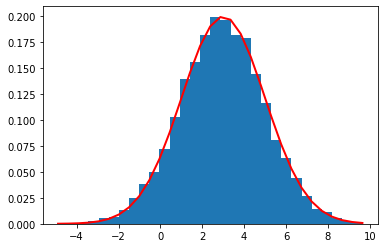

In [88]:
##As you can see, I manually generated normally distributed data, with mean=3 and standard deviation=2.
## Now, the idea is extracting a sample from this population and checking whether it was actually extracted from a population with mean=3.

import numpy as np

## mean 3 and SD = 2
mu, sigma = 3, 2 
s = np.random.normal(mu, sigma, 10000)


import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

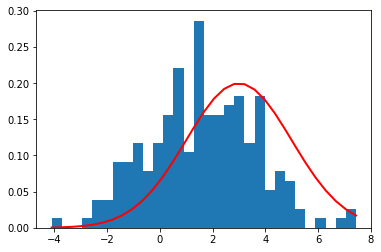

In [96]:


## mean 1.5 and SD = 2
sample_mean, sample_sigma = 1.5, 2
sample = np.random.normal(sample_mean, sample_sigma, 200)


count, bins, ignored = plt.hist(sample, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

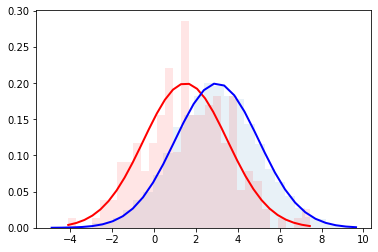

In [97]:
###First, let’s have a look at both the distribution:


count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)

plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')

plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')
plt.show()


So in red we have our sample distribution, while in blue our real population distribution. In this case, we already know the answer to our problem: our sample does not arise from a population with the blue distribution, and it is obvious since I did not extract that sample from our population. However, what if you are not provided with the real population distribution? We need to inquire about the likelihood of the mean of our sample to be equal to that of our population.

Hence, let’s compute the confidence interval of our sample. Just to recall, a confidence interval of x% expresses that, given a population and a collection of samples from that, in 95% of those samples the sample mean (or whatever parameter you are inquiring about) will be included in that interval.
We can easily compute the interval, with confidence=95%, with a scipy tool:

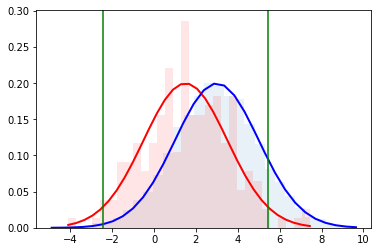

In [103]:
import scipy
ci = scipy.stats.norm.interval(0.95, loc=1.5, scale=2)
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)

plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')

plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')
plt.show()


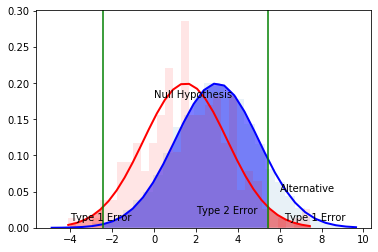

In [107]:
###Now let’s inquire at the possible outcomes of our test:

count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)

plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')

plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')

plt.fill_between(x=np.arange(-4,ci[0],0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(-4,ci[0],0.01),loc=1.5,scale=2) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(ci[1],7.5,0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[1],7.5,0.01),loc=1.5,scale=2) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(ci[0],ci[1],0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[0],ci[1],0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.5)

plt.text(x=0, y=0.18, s= "Null Hypothesis")
plt.text(x=6, y=0.05, s= "Alternative")
plt.text(x=-4, y=0.01, s= "Type 1 Error")
plt.text(x=6.2, y=0.01, s= "Type 1 Error")
plt.text(x=2, y=0.02, s= "Type 2 Error")

plt.show()

As you can see, the sample mean (1.5) is included in the Type 2 Error area (meaning that we do not reject the null when it is false). To double-check, let’s compute the p-value, keeping in mind that our confidence level is 5% (hence, we do not reject the null if the p-value is greater than 5%).



In [108]:
z_score=(sample_mean-mu)/sigma 
p_value = scipy.stats.norm.sf(abs(z_score)) 
print('P-value= {}'.format(p_value))
 
if p_value<0.05: 
     print('P-value<alpha: reject H0') 
else: 
     print('P-value>alpha: do not reject H0')

P-value= 0.2266273523768682
P-value>alpha: do not reject H0


In [121]:
import statsmodels
jobtest = pd.read_csv('./Jobtest_data.csv')
jobtest.head

<bound method NDFrame.head of     TEST  MINORITY  JPERF
0   0.28         1   1.83
1   0.97         1   4.59
2   1.25         1   2.97
3   2.46         1   8.14
4   2.51         1   8.00
5   1.17         1   3.30
6   1.78         1   7.53
7   1.21         1   2.03
8   1.63         1   5.00
9   1.98         1   8.04
10  2.36         0   3.25
11  2.11         0   5.30
12  0.45         0   1.39
13  1.76         0   4.69
14  2.09         0   6.56
15  1.50         0   3.00
16  1.25         0   5.85
17  0.72         0   1.90
18  0.42         0   3.85
19  1.53         0   2.95>

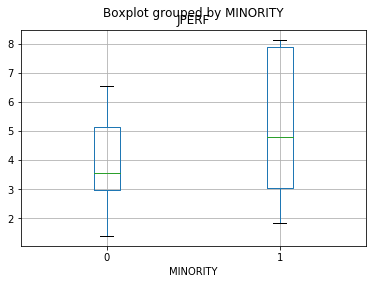

In [114]:
jobtest.boxplot(column=['JPERF'], by='MINORITY');

In [116]:
minority_0 = jobtest[jobtest['MINORITY'] == 0]
minority_1 = jobtest[jobtest['MINORITY'] == 1]
minority_0

,TEST,MINORITY,JPERF
10,2.36,0,3.25
11,2.11,0,5.30
12,0.45,0,1.39
13,1.76,0,4.69
14,2.09,0,6.56
15,1.50,0,3.00
16,1.25,0,5.85
17,0.72,0,1.90
18,0.42,0,3.85
19,1.53,0,2.95


In [124]:
## are te job performance scores for minority and non minority differnt?
import warnings
warnings.simplefilter('ignore')
from statsmodels.stats.weightstats import ttest_ind

## Testing H0 -- job perfomcance is not different
##     h1 job perfomrnce is different  

### it cehckje if the alternative if gereate than value = 0
ttest_ind(minority_1['JPERF'],minority_0['JPERF'], alternative = 'two-sided', value=0)



(1.296372732868917, 0.21122206282829198, 18.0)

In [0]:
## above tells 1.2 tehre is some diffreence in mean but how significant that tels the P value next to it:

## P-value 21% greater than 5%% means we can reject alternative hypothesis

In [125]:
## example 2:

jobtest.describe()

,TEST,MINORITY,JPERF
count,20.00000,20.000000,20.000000
mean,1.47150,0.500000,4.508500
std,0.67839,0.512989,2.227711
min,0.28000,0.000000,1.390000
25%,1.12000,0.000000,2.965000
50%,1.51500,0.500000,4.220000
75%,2.00750,1.000000,6.027500
max,2.51000,1.000000,8.140000


In [0]:
## pick median values of TEST in to two groups abd test T tests..
low_test = jobtest[jobtest['TEST'] < 1.50]
high_test = jobtest[jobtest['TEST'] >= 1.50]

In [128]:
## Now perfrom T-test  for job performance aginst employee above median and below median

ttest_ind(low_test['JPERF'],high_test['JPERF'], alternative = 'two-sided', value=0)

(-3.1453782341253196, 0.005594750418932361, 18.0)

In [0]:
## Now perfrom T-test shows there is diffrecen in average in means aof test with job perfocmance
### P- vaue -.0005  < 5% is significant..
## accept alertive hypthesis